<h1>Data Analysis with Python Project Documentation: Fast Food Sales Report Analysis</h1>


In this project, we will analyze a public dataset of restaurant sales sourced from Kaggle to uncover insights into fast food sales patterns and trends. By employing exploratory data analysis (EDA) techniques, we will examine the relationships between various factors such as product sales, time of day, and customer demographics. The primary goal is to identify which items are driving revenue and how sales fluctuate throughout the day. Through the use of visualizations like bar charts and pie charts, we aim to present our findings in a clear and engaging manner, making it easier to interpret the data. Ultimately, this analysis will enable us to provide actionable recommendations that can enhance marketing strategies and improve overall sales performance for the restaurant.

<h4>Project Description: Fast Food Sales Report Analysis.</h4>

This project analyzes a dataset derived from the Fast Food Sales Report, which captures detailed sales data from a fast food restaurant. The dataset includes key attributes such as product names, prices, quantities sold, item types (e.g., fast food and beverages), and transaction details.

<h4>Column Description:</h4>

- order_id: a unique identifier for each order.
- date: date of the transaction.
- item_name: name of the food.
- item_type: category of item (Fastfood or Beverages).
- item_price: price of the item for 1 quantity.
- Quantity: how much quantity the customer orders.
- transaction_amount: the total amount paid by customers.
- transaction_type: payment method (cash, online, others).
- received_by: gender of the person handling the transaction.
- time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

    
<h4>Primary Objectives:</h4>

1. Explore Sales Patterns: By utilizing exploratory data analysis (EDA) techniques, we aim to identify trends in product sales, assess the relationship
    between item prices and quantities ordered, and highlight the restaurant's best-selling products.

2. Revenue Insights: The project investigates which products generate the most revenue, providing insights into the financial performance of individual
   items and categories.

3. Visualization: Through various visualizations, including bar charts and scatter plots, we will present clear and intuitive representations of the
     data, making it easier to interpret the findings.

4. Data Quality Checks: We ensure the integrity of the dataset by conducting checks for missing values, inconsistencies, and potential outliers, which can affect the analysis.

5. Actionable Recommendations: Based on the insights gathered, we will provide recommendations for improving product offerings and marketing strategies to enhance customer engagement and boost sales.


This project serves as a practical application of data analysis and visualization techniques, showcasing skills in Python, pandas, and Matplotlib, while also emphasizing the importance of data-driven decision-making in the fast food industry.


Dataset Credit: This analysis utilizes the Fast Food Sales Report dataset, created by Rajat Surana on Kaggle.




<h4>1. Data Loading</h4>

To begin, I loaded the dataset using Pandas, a versatile data manipulation library in Python. This step ensures the data is ready for analysis.

In [203]:
import pandas as pd

In [204]:
df = pd.read_csv(r"C:\Users\Marveen\Downloads\archive (8)\Balaji Fast Food Sales.csv")


<h4>2. Initial Data Inspection</h4>

Before proceeding with any analysis, it is essential to understand the structure and content of the dataset.         
I performed the following steps to gain insights into the data:

<h5>2.a Previewing the data:</h5> 
    
    I reviewed the first few rows to get a sense of the values and columns.

In [205]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


<h5>2.b Checking the structure and data types:</h5>

    I examined the data types, 
    the number of rows and columns, and any missing values.

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


<h5>2.c Identify missing values:</h5> Check if any columns have missing data.

In [207]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

Upon checking the empty values, we can see that the column "transaction_type" has 107 empty values.

In data analysis, addressing missing values is crucial for ensuring data quality and reliable results. 
    Below are the steps we would do in such situations:

   <b> 1. Understand the Business Context</b>
   
   Consult stakeholders: Assess the importance of the missing data.
        Investigate reasons: Understand the causes behind data gaps.
        Fill the empty values with correct data if possible
    
 <b>2. Analyze the Impact of Missing Data </b>
 
 Quantify extent: Measure the percentage of missing values in the dataset.
    
  <b>  3. Choose an Appropriate Method </b>
  
  Remove irrelevant data: Drop rows or columns with minimal missing values if they are not critical.
        Impute missing values: Use methods such as mean, median, or predictive modeling for important data points.
                                                                                       
  <b>  4. Communicate Clearly </b>
  
Document methods: Clearly outline how missing values were handled and any potential impacts on the analysis.
        Provide recommendations: Suggest ways to enhance future data collection processes.                                                                                     
   <b> 5. Maintain Data Integrity </b>
   
Validate results: Ensure the quality of analysis after handling missing data.
        Perform sensitivity analyses: Evaluate how different handling methods affect outcomes

In [208]:
df['transaction_type']

0         NaN
1        Cash
2        Cash
3      Online
4      Online
        ...  
995       NaN
996       NaN
997       NaN
998       NaN
999    Online
Name: transaction_type, Length: 1000, dtype: object

Now we see that the values of the column 'transaction_type' consists of Cash, Online, and NaN. Let's suppose that have consulted the owner of the restaurant or the source of this data and learned that these missing values are supposed to be "Credit Cards"

We can now handle the missing data by replacing it with the value "Credit Card"

<h4>3. Data Cleaning</h4>

Fill missing values with a specific value:

In [209]:
df['transaction_type'] = df['transaction_type'].fillna("Credit Card")

In [210]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

<h5>3.a Identifying and Removing Duplicates</h5>

We can sum the boolean Series to get the total number of duplicate rows using the duplicated().sum() method.

In [211]:
df.duplicated().sum()

0

As shown above, our data set does not have any duplicate rows. That is good.
But just in case we do, we would use the drop_duplicates() method.

In [212]:
df = df.drop_duplicates()

<h5>3.b Replacing Values</h5>

To enhance the clarity and interpretability of our data analysis reports, we will replace the values 'Mr.' and 'Mrs.' with 'Male' and 'Female,' respectively. This change will make the dataset more straightforward and easier to understand for analysis.

In [248]:
df['received_by'] = df['received_by'].replace(['Mr.','Mrs.'],['Male','Female'])

<h5>3.c Converting data types: Adjusted data types for specific columns where necessary.   </h5>                                             

While reviewing the data types of each column, we found that the 'date' column is of String data type, which is why they appear as objects in the Dtype column. Since we need these columns in a proper date/time format, we'll convert them accordingly.

In addition, we also noticed that the format of the date column is not uniformed. We have date formats of 'mm/dd/yyyy' and 'mm-dd-yyyy'. Before converting them to datetime format, we need to make them uniformed first. We will replace the '/' with a '-' instead.

In [213]:
df['date'] = df['date'].str.replace('/','-')
df['date']

0      07-03-2022
1       8-23-2022
2      11-20-2022
3      02-03-2023
4      10-02-2022
          ...    
995     3-19-2023
996     9-20-2022
997     1-26-2023
998     8-27-2022
999     5-29-2022
Name: date, Length: 1000, dtype: object

Now it looks much better. Let us convert this 'date' column into a date data type

In [214]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


Now that we have the correct data types for each column, let's take a final look at our dataset to ensure we haven’t overlooked anything and that it’s ready for initial exploration.

We will verify the unique values in each categorical column to ensure there are no misspellings or inconsistencies

In [215]:

unique_values = df.select_dtypes(include = 'object').apply(lambda x: x.unique())
for column, values in unique_values.items():
    print(column, values)


item_name ['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']
item_type ['Fastfood' 'Beverages']
transaction_type ['Credit Card' 'Cash' 'Online']
received_by ['Mr.' 'Mrs.']
time_of_sale ['Night' 'Afternoon' 'Evening' 'Morning' 'Midnight']


In [216]:
df.head(50)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Credit Card,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-05-03,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-06-10,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


Great! Our Dataset is now looking good and clean. Let us now proceed to the next phase of our Data Analysis which is called Exploratory Data Analysis

<h4>4. Exploratory Data Analysis (EDA)</h4>

In this section, I will conduct Exploratory Data Analysis (EDA) to better understand the dataset. EDA helps us discover patterns, spot any errors, and identify relationships between different variables. By using simple statistics and visualizations, I will present key insights that will guide our analysis moving forward.

We will import the Matplotlib module to facilitate the visualization of our Exploratory Data Analysis (EDA), enhancing our ability to interpret the data effectively.

In [217]:
import matplotlib.pyplot as plt

In [218]:
df.describe().round(0)

,order_id,date,item_price,quantity,transaction_amount
count,1000.0,1000,1000.0,1000.0,1000.0
mean,500.0,2022-10-03 14:39:50.400000,33.0,8.0,275.0
min,1.0,2022-04-01 00:00:00,20.0,1.0,20.0
25%,251.0,2022-07-04 00:00:00,20.0,4.0,120.0
50%,500.0,2022-10-07 12:00:00,25.0,8.0,240.0
75%,750.0,2023-01-02 00:00:00,50.0,12.0,360.0
max,1000.0,2023-03-30 00:00:00,60.0,15.0,900.0
std,289.0,NaN,15.0,4.0,204.0


To begin, I would like to review the available products to understand what the restaurant offers and their respective prices.

I believe a bar chart will provide a clear visualization for this purpose.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Aalopuri'),
  Text(1, 0, 'Vadapav'),
  Text(2, 0, 'Panipuri'),
  Text(3, 0, 'Sugarcane juice'),
  Text(4, 0, 'Cold coffee'),
  Text(5, 0, 'Frankie'),
  Text(6, 0, 'Sandwich')])

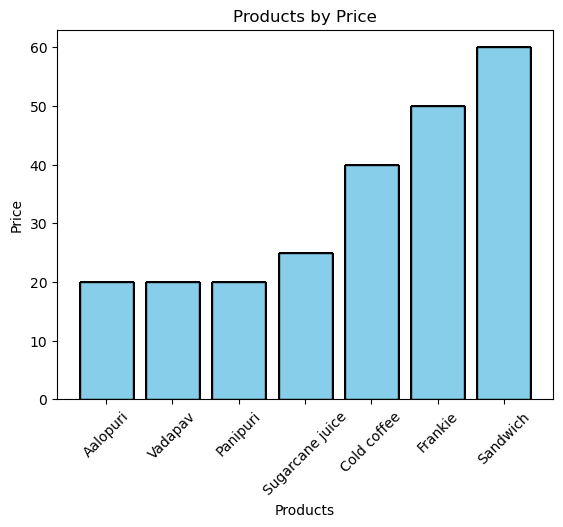

In [219]:
price_sorted = df['item_price'].argsort()
plt.bar(df['item_name'][price_sorted],df['item_price'][price_sorted], edgecolor = 'black', color = 'skyblue')
plt.title("Products by Price")
plt.xlabel("Products")
plt.ylabel("Price")
plt.xticks(rotation = 45)

Based on the bar chart, the cheapest products in the Fast Food category are Aalopuri, Vadapav, and Panipuri, each priced at 20. The most expensive Fast Food item at the restaurant is a sandwich, which costs 60, followed closely by the Frankie at 50. In the Beverage category, the Cold Coffee is priced at 40, which is 60% higher than the Sugarcane Juice, priced at only 25.

Now that we've analyzed the product prices, it's important to examine how often each product is ordered. A bar chart of order quantities for each product will give us valuable insights into which items are the most popular and how demand varies across the menu. Let’s dive into the distribution of order quantities to see which products are driving the most sales.

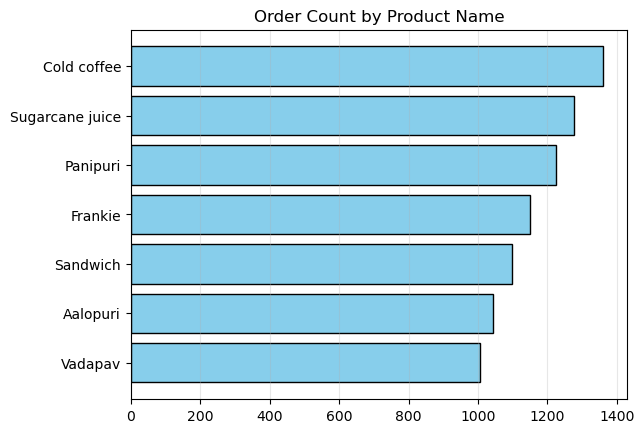

In [220]:
sorted_data = df.groupby('item_name')['quantity'].sum().sort_values(ascending=True)
plt.barh(sorted_data.index, sorted_data.values, edgecolor = 'black', color = 'skyblue')
plt.title("Order Count by Product Name")
plt.grid(axis = 'x', alpha = 0.3)

In [221]:
sorted_data = df.groupby('item_name')['quantity'].sum().sort_values(ascending=True)
sorted_data

item_name
Vadapav            1006
Aalopuri           1044
Sandwich           1097
Frankie            1150
Panipuri           1226
Sugarcane juice    1278
Cold coffee        1361
Name: quantity, dtype: int64

From these insights, it's clear that our beverages are the best-sellers, with order counts between 1,200 and 1,400. In third place, Panipuri stands out as the top-ordered item in the Fast Food category. This highlights the products that are most popular with customers.

This brings us to an interesting question: "Does the price of a product correlate with its likelihood of being purchased?"

To better understand this correlation, a scatter plot will help us visualize the relationship between price and order frequency more clearly.

Text(0, 0.5, 'Total Quantity Ordered')

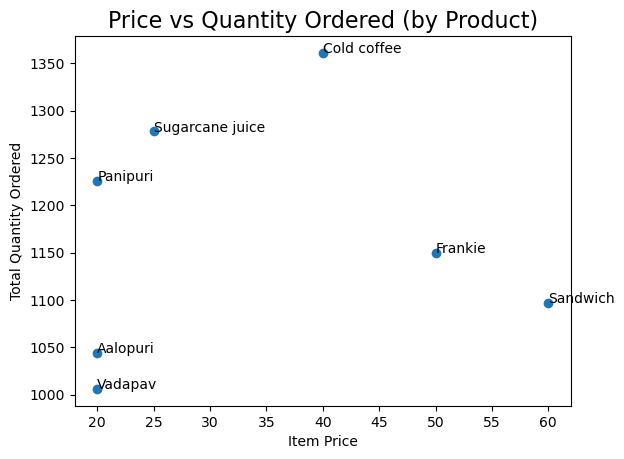

In [222]:

scatter_data = df.groupby('item_name').agg({'item_price': 'mean', 'quantity': 'sum'})

plt.scatter(scatter_data['item_price'], scatter_data['quantity'])
for item, price, quantity in zip(scatter_data.index, scatter_data['item_price'], scatter_data['quantity']):
    plt.text(price, quantity, item, ha = 'left')



plt.title("Price vs Quantity Ordered (by Product)", fontsize=16)
plt.xlabel("Item Price")
plt.ylabel("Total Quantity Ordered")

The scatter plot shows that price has little correlation with order quantity, indicating that factors like product quality and customer preferences are more influential. 

Notably, some higher-priced items like the Cold Coffee still attract significant orders, highlighting the need for targeted marketing strategies that account for diverse consumer motivations.

Now, let's investigate whether Cold Coffee, as the most ordered item, also leads in generating revenue for the restaurant. Will it maintain its position as the top revenue generator, or will other products take the lead? Let’s find out.

Text(0.5, 0, 'Revenue')

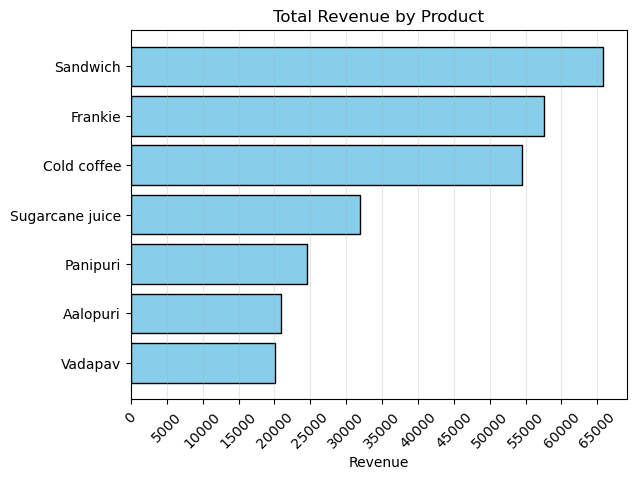

In [223]:
revenue_grouped = df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=True)
revenue_grouped

plt.barh(revenue_grouped.index, revenue_grouped.values, color = 'skyblue', edgecolor = 'black')
plt.xticks(range(0, 65001, 5000)) 
plt.xticks(rotation = 45)
plt.grid(axis = 'x', alpha = 0.3)
plt.title("Total Revenue by Product")
plt.xlabel("Revenue")

By looking at the graphs we made until now, we can already create some insights about the data we are looking at.


A few insights so far:

Top Revenue Generators: Surprisingly, the Sandwich stands out as the highest revenue-generating product, bringing in 65,820. This suggests that while it may not be the most frequently ordered item(5th Ranked), its higher price point contributes significantly to the restaurant's overall revenue.

Something about Cold Coffee: Surprisingly, Cold Coffee not only has the highest order count at 1,361 but also ranks second in revenue with 54,440. This indicates that it is both popular among customers and contributes substantially to the restaurant's earnings, highlighting its importance on the menu.

Price vs. Popularity: The data reveals a correlation between price and order count. While Vadapav and Aalopuri have lower prices and decent order counts, they generate less revenue than more expensive items like Panipuri and Frankie. This could suggest that customers are willing to spend more on items perceived as higher quality or more filling.

Potential for Upselling: Given the high demand for Cold Coffee and its substantial revenue, there may be opportunities to introduce complementary items (like desserts or snacks) that could enhance customer experience and further increase total sales.



Let's continue our analysis

We will create a straightforward timeline of the restaurant's revenue using a line graph, as it is one of the most effective ways to visualize trends over time. This will help us uncover any hidden insights that may assist the owner in making informed decisions.





<h4>Timeline Analysis of Monthly Sales</h4>


In this section, we create a simple line graph to visualize the restaurant's monthly revenue. The goal is to identify trends and patterns in sales, which can assist the owner in making better business decisions.


Setting the Date as Index: We begin by setting the date column as the index of the DataFrame, allowing us to perform time-based operations. This is crucial when analyzing trends over time.

In [224]:
df.set_index('date', inplace=True)

Resampling Sales Data: Next, we aggregate the transaction_amount column by resampling the data monthly. We use ME, which ensures that we sum the sales at the end of each month. This step is essential to convert the daily sales data into monthly totals.

In [225]:
monthly_sales = df['transaction_amount'].resample('ME').sum()

Resetting the Index: After resampling, we reset the index to convert the date index back into a column. This makes it easier to plot the data using the date on the x-axis.

In [226]:
monthly_sales = monthly_sales.reset_index()

Plotting the Sales Data: We then plot the monthly sales using a line graph, where the x-axis represents the months, and the y-axis represents the total sales for each month. We adjust the figure size and rotate the x-axis labels for better readability. The y-axis is also scaled between 10,000 and 30,000 for a clearer visualization.

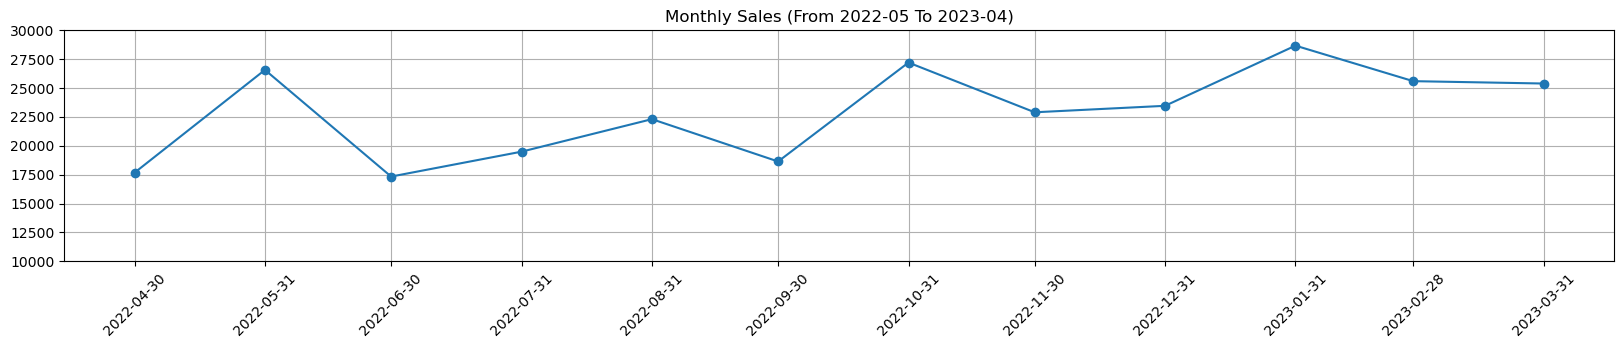

In [227]:
plt.figure(figsize=(20,3))
plt.plot(monthly_sales.date, monthly_sales['transaction_amount'], marker = 'o', label = 'Monthly Sales')
plt.title('Monthly Sales (From 2022-05 To 2023-04)')
plt.xticks(monthly_sales.date, rotation=45)
plt.ylim(10000,30000)
plt.grid(True)
plt.show();


From this graph, we can observe a steady growth in the restaurant's monthly revenue from around 17,500 in April 2022 to just a little above 25000 in March 2023. While the overall trend is upward, there are some fluctuations, with notable revenue spikes in May 2022, October 2022, and January 2023. A significant drop of approximately 7,500 in sales occurred in June 2022.

Now let's dive a little deeper and examine the performance of our restaurant's beverages during this period. By analyzing the monthly sales trends for specific drinks, we can identify which beverages contributed the most to revenue and if there were any significant shifts in customer preferences over time.

<h4>Beverages Monthly Sales Line Plot (Cold Coffee & Sugarcane Juice)</h4>

This plot visualizes the monthly sales of Cold Coffee and Sugarcane Juice from May 2022 to April 2023. Using line plots, we can track the changes in sales for both beverages over time. The x-axis represents the months, while the y-axis shows the sales amounts. This chart provides an overview of the sales performance for these beverages, helping to identify any trends or patterns in their monthly sales.

In [228]:
ccoffee = df[df['item_name'] == 'Cold coffee']
ccoffee = ccoffee['transaction_amount'].resample('ME').sum()
ccoffee = ccoffee.reset_index()

In [229]:
sugarcane = df[df['item_name'] == 'Sugarcane juice']
sugarcane = sugarcane['transaction_amount'].resample('ME').sum()
sugarcane = sugarcane.reset_index()

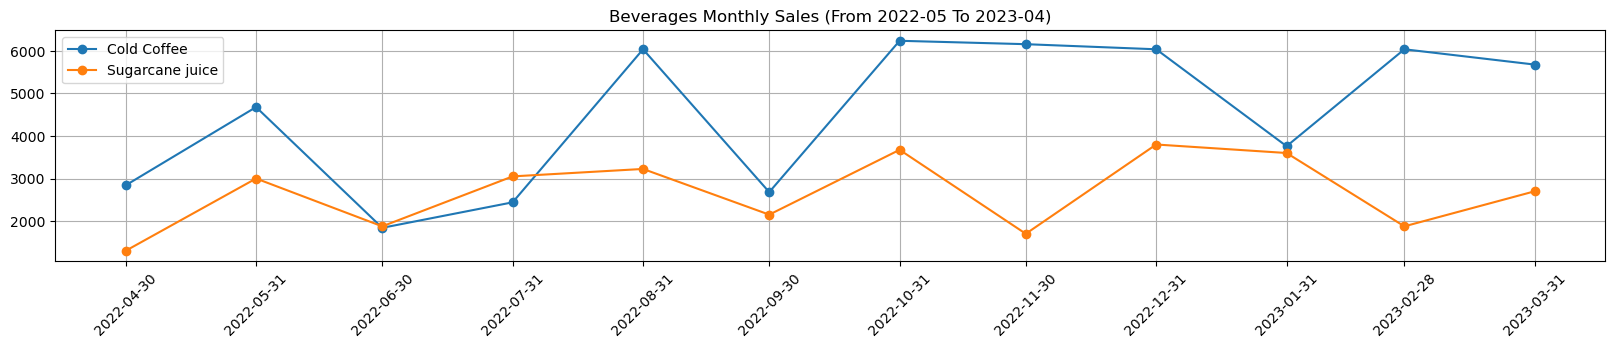

In [230]:
plt.figure(figsize=(20,3))
plt.plot(ccoffee.date, ccoffee['transaction_amount'], marker = 'o', label = 'Cold Coffee')
plt.plot(sugarcane.date, sugarcane['transaction_amount'], marker = 'o', label = 'Sugarcane juice')
plt.title('Beverages Monthly Sales (From 2022-05 To 2023-04)')
plt.xticks(ccoffee.date, rotation=45)
plt.grid(True)
plt.legend()
plt.show();

As we can see, the sales patterns for both beverages are quite similar, with both experiencing fluctuations over time. However, in November 2022, the revenue from Sugarcane juice dropped by approximately 2,000, while Cold Coffee only saw a minor decline of a few hundred, maintaining sales above 6,000. Interestingly, in February 2023, while Sugarcane juice sales decreased by nearly 2,000, Cold Coffee sales increased by around 2,000. Overall, it's clear that Cold Coffee generates more revenue within our beverage category, as evidenced by the previous charts.

Insights into the beverage category reveal a strong performance for Cold Coffee, which consistently generates higher sales compared to Sugarcane Juice. The divergence in their sales trends indicates potential for strategic promotions to boost Sugarcane Juice sales during slower months, particularly in November and February. Given Cold Coffee's resilience, the owner may consider expanding its visibility on the menu or introducing variations to capitalize on its popularity. By leveraging these insights, the restaurant can enhance beverage offerings and improve overall revenue.

-

-

<h4>Fast Food Timeline Analysis.</h4>

Now, we will conduct a similar analysis for the Fast Food category. By examining the monthly sales trends for our fast food items, we can gain insights into customer preferences and identify any patterns or fluctuations in sales. This will allow us to determine which fast food items are driving revenue and whether there are specific months where sales peak or decline. Understanding these trends will help us make informed decisions about menu offerings, promotions, and inventory management.

In this code, we analyze the sales data for the entire Fast Food category. First, we filter the original DataFrame to create a new one that includes only the rows where the item_type is "(selected_Fastfood)". Then, we aggregate the sales data by month using the resample() method to calculate the total transaction_amount for each month, effectively summing the sales figures. Finally, we reset the index to convert the monthly dates back into a regular column, making the DataFrame easier to work with for further analysis or visualization. This process allows us to examine the monthly sales trends specifically for the Fast Food category.

In [231]:
aalopuri = df[df['item_name'] == 'Aalopuri']
aalopuri = aalopuri['transaction_amount'].resample('ME').sum()
aalopuri = aalopuri.reset_index()


In [232]:
vadapav = df[df['item_name'] == 'Vadapav']
vadapav = vadapav['transaction_amount'].resample('ME').sum()
vadapav = vadapav.reset_index()


In [233]:
frankie = df[df['item_name'] == 'Frankie']
frankie = frankie['transaction_amount'].resample('ME').sum()
frankie = frankie.reset_index()


In [234]:
sandwich = df[df['item_name'] == 'Sandwich']
sandwich = sandwich['transaction_amount'].resample('ME').sum()
sandwich = sandwich.reset_index()



In [235]:
panipuri = df[df['item_name'] == 'Panipuri']
panipuri = panipuri['transaction_amount'].resample('ME').sum()
panipuri = panipuri.reset_index()


This code creates a line plot to compare the monthly sales of five fast food items: Panipuri, Sandwich, Frankie, Vadapav, and Aalopuri. Each line represents the sales trends over the period from May 2022 to April 2023, with data points marked for clarity. The plot includes a title for context, rotated x-axis ticks for readability, and grid lines for visual structure. A legend identifies each item, and the final line displays the plot for analysis.

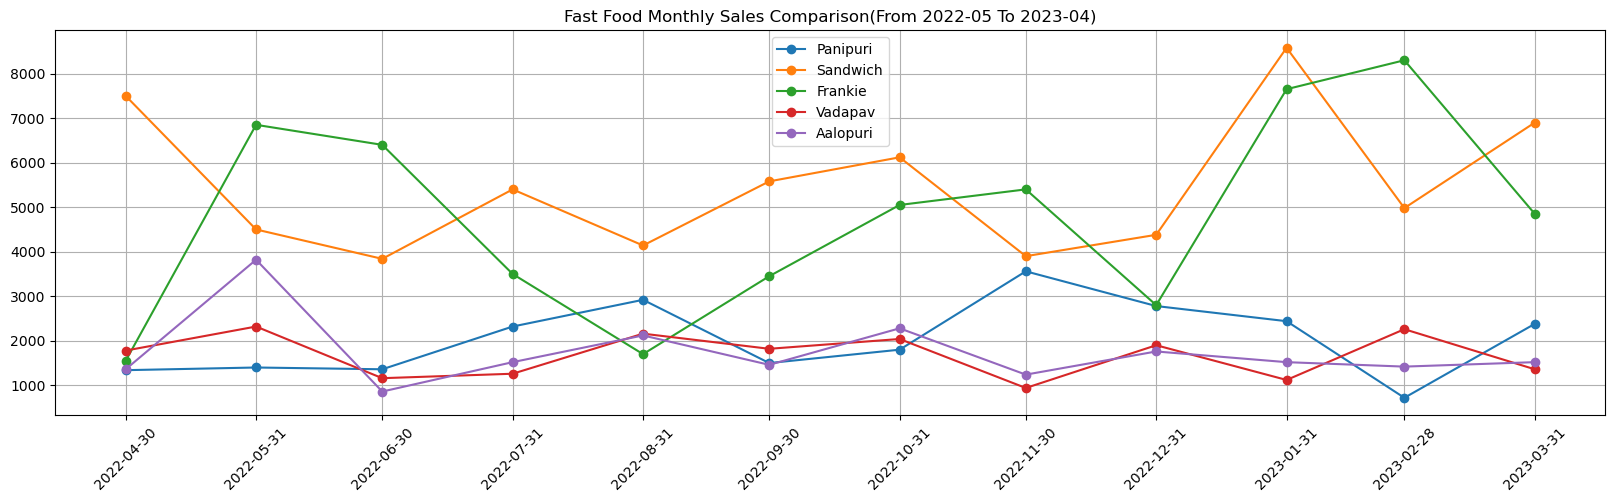

In [236]:
plt.figure(figsize=(20,5))
plt.plot(panipuri.date, panipuri['transaction_amount'], marker = 'o', label = 'Panipuri')
plt.plot(sandwich.date, sandwich['transaction_amount'], marker = 'o', label = 'Sandwich')
plt.plot(frankie.date, frankie['transaction_amount'], marker = 'o', label = 'Frankie')
plt.plot(vadapav.date, vadapav['transaction_amount'], marker = 'o', label = 'Vadapav')
plt.plot(aalopuri.date, aalopuri['transaction_amount'], marker = 'o', label = 'Aalopuri')
plt.title('Fast Food Monthly Sales Comparison(From 2022-05 To 2023-04)')
plt.xticks(panipuri.date, rotation=45)
plt.grid(True)
plt.legend()
plt.show();

We can categorize the fast food items into two groups based on their sales patterns. The first group includes Vadapav, Panipuri, and Aalopuri, which generally exhibit a stable trend, fluctuating between 1,000 and 4,000 throughout the period. In contrast, Frankie and Sandwich make up the second group, characterized by more pronounced fluctuations. Notably, these two consistently rank as the top contributors to revenue in the fast food category. For instance, in April 2022, Sandwich stood out as the only item generating over 7,000 in revenue, while the others hovered around 1,000 to 2,000. Frankie, despite performing well overall, was the least profitable item in August 2022. Interestingly, Sandwich reached its peak in January 2023, with revenue soaring to approximately 8,500, closely followed by Frankie, which surpassed 8,000 in February 2023.

Insights for the owner reveal that Vadapav, Panipuri, and Aalopuri maintain stable sales patterns, indicating potential for promotional efforts to increase revenue. In contrast, Frankie and Sandwich exhibit more significant fluctuations, highlighting opportunities for targeted marketing strategies. The peak in Sandwich sales in January suggests that seasonal trends could be leveraged for higher sales. By focusing on these insights, the restaurant can optimize menu offerings and enhance customer satisfaction, ultimately driving greater profitability.

<h4>Transaction Type Analysis</h4>

In this section, we will analyze the various payment methods used by customers in our restaurant. Understanding the distribution of payment methods is crucial for assessing customer preferences and optimizing our payment processing systems. To achieve this, we will group our transaction data by transaction_type and sum the corresponding transaction_amount for each method. By sorting the results in ascending order, we will identify which payment methods are the least to most popular among our customers. This analysis will provide valuable insights into customer behavior and help inform strategic decisions regarding payment options offered in the future.

In [237]:
payment_methods = df.groupby('transaction_type')['transaction_amount'].sum().reset_index()
payment_methods = payment_methods.sort_values(by = 'transaction_amount',ascending = True)
payment_methods

,transaction_type,transaction_amount
1,Credit Card,31795
2,Online,110595
0,Cash,132840


This code creates a pie chart to visualize the distribution of payment methods used by customers in the restaurant. It uses the total transaction amounts for each payment method as the slice sizes, with labels indicating the types of payments (e.g., Cash, Credit Card, Online). The chart displays percentages for clarity and helps assess customer preferences and the significance of each payment method in overall transactions.

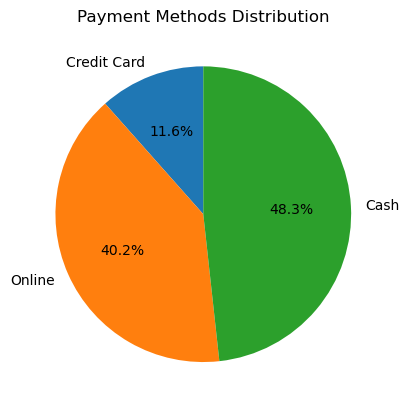

In [238]:
plt.pie(payment_methods['transaction_amount'], labels=payment_methods['transaction_type'], autopct='%1.1f%%', startangle=90)
plt.title('Payment Methods Distribution')
plt.show()

Interpretation: The pie chart reveals the distribution of payment methods used by customers in the restaurant. Cash accounts for 48% of transactions, while online payments constitute 40%. Credit card payments are significantly lower, at just 11%.

Insight: The high percentage of cash payments (48%) suggests that a significant portion of customers prefers traditional transaction methods. Online payments are also substantial at 40%, indicating a growing trend in digital transactions. In contrast, the low percentage of credit card usage (11%) may indicate a potential area for growth. The restaurant owner could consider incentivizing credit card payments through discounts or loyalty programs to increase their usage and streamline transaction processing.

<h4>Transaction by Gender Analysis</h4>

In this analysis, we will examine the transaction data categorized by gender. By evaluating the sales figures attributed to male and female staff, we can gain insights into customer preferences and spending behaviors. Understanding how gender influences transactions can help the restaurant tailor its marketing strategies and enhance customer engagement, ultimately leading to improved sales performance.

This code groups the transaction data by the "received_by" column, summing the transaction amounts for each gender. The reset_index() method converts the result back into a DataFrame, resulting in gender_sales, which shows total sales by gender.

In [244]:
gender_sales = df.groupby('received_by')['transaction_amount'].sum().reset_index()
gender_sales

,received_by,transaction_amount
0,Mr.,143440
1,Mrs.,131790


This code generates a pie chart illustrating the sales distribution by gender, displaying percentages and labeling each slice accordingly.

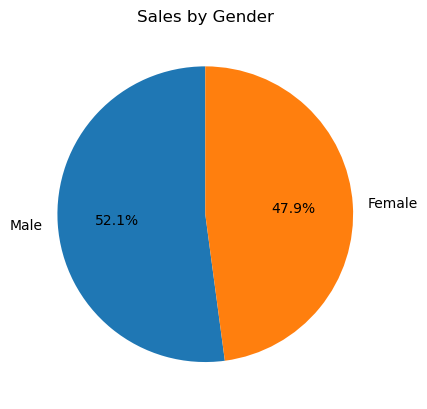

In [246]:
plt.pie(gender_sales['transaction_amount'], labels=gender_sales['received_by'], autopct='%1.1f%%', startangle=90)
plt.title('Sales by Gender')
plt.show()

The analysis reveals a nearly equal distribution of sales by gender, with males accounting for 52% and females for 48%. This indicates a balanced customer base in terms of gender representation.

Building on the insights from our previous pie chart, which revealed a near-even split in sales between male and female customers, we now delve deeper into the revenue generated per product by the gender of the sales agent. This is to see if there are some products that are sold more by a specific gender of the person handling the transaction.

We will create a side-by-side bar chart to effectively compare the sales performance of each product by gender. This visual format will allow for immediate visual differentiation between male and female sales agents for each item, making it easy to identify patterns and trends at a glance. Side-by-side comparisons will be particularly useful in this context, as they will enable us to quickly assess which gender is driving sales for specific products, highlighting potential areas for targeted marketing and inventory decisions. 

In [264]:
female = df[df['received_by'] == 'Female']


,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
date,,,,,,,,,
2022-06-10,9,Panipuri,Fastfood,20,1,20,Cash,Female,Morning
2022-12-01,11,Frankie,Fastfood,50,8,400,Online,Female,Afternoon
2022-07-12,12,Vadapav,Fastfood,20,8,160,Online,Female,Night
2022-12-22,13,Panipuri,Fastfood,20,9,180,Online,Female,Afternoon
2023-02-03,15,Aalopuri,Fastfood,20,3,60,Cash,Female,Evening
...,...,...,...,...,...,...,...,...,...
2022-07-17,993,Frankie,Fastfood,50,3,150,Online,Female,Night
2022-11-01,994,Panipuri,Fastfood,20,2,40,Online,Female,Evening
2023-03-19,996,Frankie,Fastfood,50,10,500,Credit Card,Female,Evening


In [265]:
female = female.groupby('item_name')['transaction_amount'].sum().reset_index().sort_values(by = 'transaction_amount',ascending = False)


,item_name,transaction_amount
2,Frankie,30700
4,Sandwich,27660
1,Cold coffee,27480
5,Sugarcane juice,16550
3,Panipuri,10820
6,Vadapav,9360
0,Aalopuri,9220


In [266]:
male = df[df['received_by'] == 'Male']


,order_id,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
date,,,,,,,,,
2022-07-03,1,Aalopuri,Fastfood,20,13,260,Credit Card,Male,Night
2022-08-23,2,Vadapav,Fastfood,20,15,300,Cash,Male,Afternoon
2022-11-20,3,Vadapav,Fastfood,20,1,20,Cash,Male,Afternoon
2023-02-03,4,Sugarcane juice,Beverages,25,6,150,Online,Male,Night
2022-10-02,5,Sugarcane juice,Beverages,25,8,200,Online,Male,Evening
...,...,...,...,...,...,...,...,...,...
2022-10-11,989,Cold coffee,Beverages,40,13,520,Cash,Male,Afternoon
2022-10-21,992,Sandwich,Fastfood,60,5,300,Cash,Male,Morning
2022-06-18,995,Sugarcane juice,Beverages,25,1,25,Online,Male,Night


In [267]:
male = male.groupby('item_name')['transaction_amount'].sum().reset_index().sort_values(by = 'transaction_amount',ascending = False)


,item_name,transaction_amount
4,Sandwich,38160
1,Cold coffee,26960
2,Frankie,26800
5,Sugarcane juice,15400
3,Panipuri,13700
0,Aalopuri,11660
6,Vadapav,10760


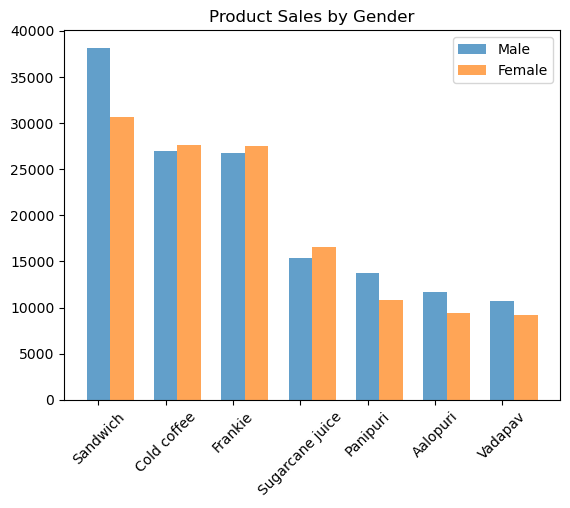

In [281]:

bar_width = 0.35
x_male = range(len(male))
x_female = [x + bar_width for x in x_male]

plt.bar(x_male, male['transaction_amount'], label='Male', alpha=0.7, width = bar_width)
plt.bar(x_female, female['transaction_amount'], label='Female', alpha=0.7, width = bar_width)
plt.xticks(x_male,male['item_name'], rotation = 45)

plt.title('Product Sales by Gender')
plt.legend()
plt.show()

The analysis shows that there are no significant differences in sales results between genders, except for sandwiches, where males generated 5,000 more in sales than females. Overall, the sales performance remains consistent across all products.

<h4>Time of Day Analysis</h4>

In this section, we will analyze how the sales of each product fluctuate based on different times of the day. By examining the transaction amounts for various items like sandwiches, beverages, and fast food options, we aim to identify any significant patterns or trends. This will help us understand which products perform best during specific time periods, potentially guiding decisions for inventory management and targeted promotions.

_

In this code, we are analyzing the sales of sandwiches based on the time of day. Here's a breakdown of the steps:

Filter for Sandwich Sales: We first create a subset of the dataframe (df) that includes only the transactions where the item sold is a sandwich.

Group by Time of Sale: We group these sandwich sales by the time_of_sale column and sum the transaction_amount for each time period. This gives us the total revenue for sandwiches during each time of day.

Set Categorical Order: We then set the time_of_sale as a categorical variable, using the specified time_order list, which defines the order in which the time periods should appear (Morning, Afternoon, Evening, etc.).

Sort by Time of Sale: Finally, we sort the sandwich sales data based on this ordered time category to ensure that the data is displayed in the correct chronological order.

We will repeat this process for all other products to analyze their sales patterns throughout the day.

In [317]:
time_order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']

tod_sandwich = df[df['item_name'] == 'Sandwich']
tod_sandwich = tod_sandwich.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_sandwich['time_of_sale'] = pd.Categorical(tod_sandwich['time_of_sale'], categories=time_order, ordered=True)
tod_sandwich = tod_sandwich.sort_values('time_of_sale')
tod_sandwich

,time_of_sale,transaction_amount
3,Morning,14040
0,Afternoon,9840
1,Evening,12360
4,Night,17520
2,Midnight,12060


In [312]:
tod_frankie = df[df['item_name'] == 'Frankie']
tod_frankie = tod_frankie.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_frankie['time_of_sale'] = pd.Categorical(tod_frankie['time_of_sale'], categories=time_order, ordered=True)
tod_frankie = tod_frankie.sort_values('time_of_sale')
tod_frankie

,time_of_sale,transaction_amount
3,Morning,10200
0,Afternoon,11900
1,Evening,12000
4,Night,13500
2,Midnight,9900


In [322]:
tod_panipuri = df[df['item_name'] == 'Panipuri']
tod_panipuri = tod_panipuri.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_panipuri['time_of_sale'] = pd.Categorical(tod_panipuri['time_of_sale'], categories=time_order, ordered=True)
tod_panipuri = tod_panipuri.sort_values('time_of_sale')
tod_panipuri

,time_of_sale,transaction_amount
3,Morning,4660
0,Afternoon,4600
1,Evening,4820
4,Night,4880
2,Midnight,5560


In [323]:
tod_vadapav = df[df['item_name'] == 'Vadapav']
tod_vadapav = tod_vadapav.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_vadapav['time_of_sale'] = pd.Categorical(tod_vadapav['time_of_sale'], categories=time_order, ordered=True)
tod_vadapav = tod_vadapav.sort_values('time_of_sale')
tod_vadapav

,time_of_sale,transaction_amount
3,Morning,3900
0,Afternoon,3880
1,Evening,3980
4,Night,3660
2,Midnight,4700


In [325]:
tod_aalopuri = df[df['item_name'] == 'Aalopuri']
tod_aalopuri = tod_aalopuri.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_aalopuri['time_of_sale'] = pd.Categorical(tod_aalopuri['time_of_sale'], categories=time_order, ordered=True)
tod_aalopuri = tod_aalopuri.sort_values('time_of_sale')
tod_aalopuri

,time_of_sale,transaction_amount
3,Morning,4300
0,Afternoon,4520
1,Evening,2720
4,Night,4880
2,Midnight,4460


In [324]:
tod_coldcoffee = df[df['item_name'] == 'Cold coffee']
tod_coldcoffee = tod_coldcoffee.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_coldcoffee['time_of_sale'] = pd.Categorical(tod_coldcoffee['time_of_sale'], categories=time_order, ordered=True)
tod_coldcoffee = tod_coldcoffee.sort_values('time_of_sale')
tod_coldcoffee

,time_of_sale,transaction_amount
3,Morning,11480
0,Afternoon,13480
1,Evening,9400
4,Night,11960
2,Midnight,8120


In [326]:
tod_sugarcane = df[df['item_name'] == 'Sugarcane juice']
tod_sugarcane = tod_sugarcane.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_sugarcane['time_of_sale'] = pd.Categorical(tod_sugarcane['time_of_sale'], categories=time_order, ordered=True)
tod_sugarcane = tod_sugarcane.sort_values('time_of_sale')
tod_sugarcane

,time_of_sale,transaction_amount
3,Morning,5150
0,Afternoon,8125
1,Evening,7075
4,Night,5675
2,Midnight,5925


We will use subplots to display all the bar charts in a single figure, allowing for a direct comparison of the sales patterns across different products. This approach helps visualize the data side by side, making it easier to identify trends and differences between the sales performance of various products during different times of the day.

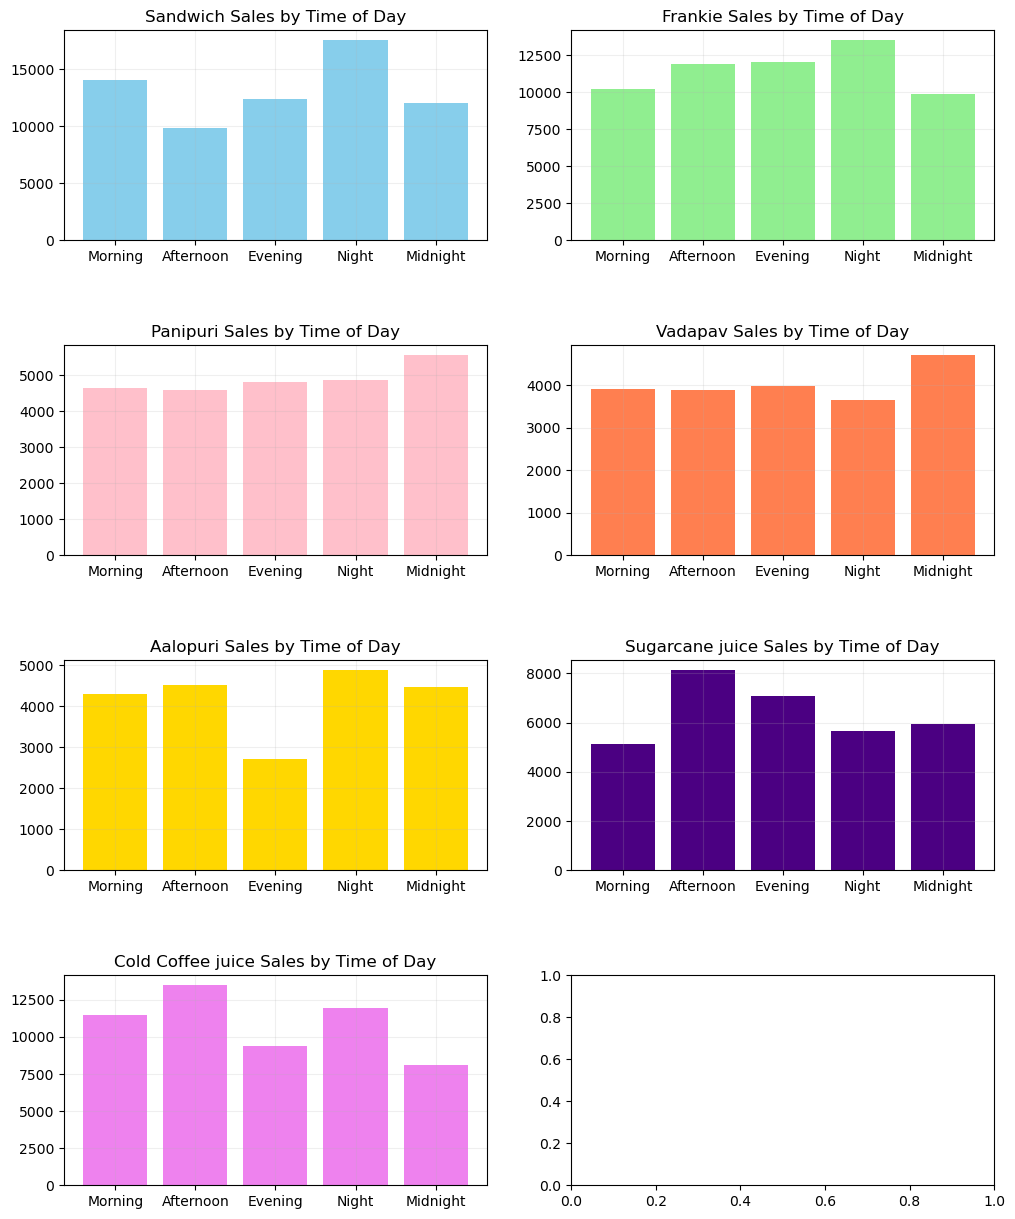

In [338]:
fig, ((bar1, bar2), (bar3, bar4), (bar5, bar6), (bar7,_)) = plt.subplots(4, 2, figsize=(12, 15))


bar1.bar(tod_sandwich['time_of_sale'], tod_sandwich['transaction_amount'], color='skyblue')
bar1.set_title('Sandwich Sales by Time of Day')
bar1.grid(alpha = 0.2)



bar2.bar(tod_frankie['time_of_sale'], tod_frankie['transaction_amount'], color='lightgreen')
bar2.set_title('Frankie Sales by Time of Day')
bar2.grid(alpha = 0.2)

bar3.bar(tod_panipuri['time_of_sale'], tod_panipuri['transaction_amount'], color='pink')
bar3.set_title('Panipuri Sales by Time of Day')
bar3.grid(alpha = 0.2)

bar4.bar(tod_vadapav['time_of_sale'], tod_vadapav['transaction_amount'], color='coral')
bar4.set_title('Vadapav Sales by Time of Day')
bar4.grid(alpha = 0.2)

bar5.bar(tod_aalopuri['time_of_sale'], tod_aalopuri['transaction_amount'], color='gold')
bar5.set_title('Aalopuri Sales by Time of Day')
bar5.grid(alpha = 0.2)

bar6.bar(tod_sugarcane['time_of_sale'], tod_sugarcane['transaction_amount'], color='indigo')
bar6.set_title('Sugarcane juice Sales by Time of Day')
bar6.grid(alpha = 0.2)

bar7.bar(tod_coldcoffee['time_of_sale'], tod_coldcoffee['transaction_amount'], color='violet')
bar7.set_title('Cold Coffee juice Sales by Time of Day')
bar7.grid(alpha = 0.2)


plt.subplots_adjust(hspace=0.5)
plt.show()

After plotting the bar charts, we can identify key patterns and trends in sales across different products and times of day. These insights can help the owner make informed decisions, such as targeting marketing efforts during peak selling times, addressing underperforming periods with special promotions, recognizing consistently popular items, and creating cross-promotion opportunities.

- Sandwiches

The sales data for sandwiches indicates that the highest revenue occurs during the Night shift (17,520), followed by the Morning (14,040) and Evening (12,360). The Afternoon and Midnight shifts show lower sales at 9,840 and 12,060, respectively. This peak in Night sales suggests a strong demand for sandwiches among late-night diners, while the lower Afternoon sales highlight an opportunity for targeted promotions to boost revenue during that time.

- Frankie

The sales data for Frankie reveals consistent performance throughout the day, peaking during the Night, followed closely by the Morning. Afternoon and Evening sales remain stable, while Midnight sales are the lowest. This trend indicates Frankie's popularity during evening and night hours, suggesting an opportunity for late-night promotions. 

- Panipuri

The sales data for Panipuri reveals a relatively even performance throughout the day, with slight increases in the Evening and Night hours. The Midnight sales are the highest, indicating some popularity during late-night hours.

- Vadapav

The sales data for Vadapav shows a fairly consistent performance throughout the day, with a slight increase in the Evening hours. The Midnight sales peak, suggesting that Vadapav enjoys some popularity during late-night snacking. The Morning and Afternoon sales are relatively similar and stable, while the Night sales dip slightly.

- Aalopuri

The sales figures for Aalopuri reveal a varied performance throughout the day, with the highest sales occurring during the Night. The Afternoon sales are slightly above the Morning, while Evening sales significantly drop, suggesting a decline in demand during that time. The Midnight sales are comparable to those in the Afternoon and Morning, indicating that Aalopuri may be a popular choice for late-night diners. Overall, there appears to be a distinct peak in the Night, highlighting a potential opportunity to promote Aalopuri more effectively during the Evening to capture that demand.

- Sugarcane Juice

For Sugarcane Juice, the sales reveal that the highest sales occur in the Afternoon, while the lowest sales happen in the Morning. This pattern suggests that demand peaks in the Afternoon, while the Morning shows the least interest. The consistent performance during the Evening and Midnight indicates stable sales throughout those times, allowing for potential targeted marketing strategies during peak hours.

- Cold Coffee

For Cold Coffee, sales data shows that the highest revenue occurs in the Afternoon, making it the biggest contributor among the beverages. The Morning sales are also notable, indicating a steady demand early in the day. However, sales decline in the Evening, suggesting reduced demand as the day progresses, and Midnight sales are the lowest, indicating that Cold Coffee is less popular during late-night hours. This trend highlights an opportunity for the owner to capitalize on the peak Afternoon sales

<h2>Restaurant Sales Report: PROJECT SUMMARY</h2>

Project Summary and Conclusion

In this project, we undertook a comprehensive analysis of sales data to uncover actionable insights that can guide decision-making for the restaurant. We began by thoroughly cleaning the dataset, ensuring its integrity for subsequent analysis. Utilizing exploratory data analysis (EDA) techniques, we identified trends in product sales and assessed relationships between item prices and quantities ordered.

Our analysis revealed valuable insights into revenue generation, allowing us to pinpoint the best-performing products and categories. We employed various visualizations, including bar charts and pie charts, to present our findings in an intuitive manner, making it easier for stakeholders to grasp the key takeaways.

In addition to exploring sales patterns, we conducted rigorous data quality checks to identify and address any inconsistencies or outliers that could affect our conclusions. This step was crucial in ensuring the reliability of our analysis.

The insights derived from our work led to actionable recommendations aimed at enhancing product offerings and optimizing marketing strategies. By focusing on customer preferences and sales performance, the restaurant can improve customer engagement and drive sales growth.

Overall, this project not only highlights the importance of data-driven decision-making but also showcases our ability to navigate the entire data analysis process, from cleaning and exploring data to presenting meaningful insights and recommendations. Thank you for your attention, and we are excited about the potential these findings hold for the restaurant's future success.